# Chapter 13 - Probabilistic Reasoning

*In which we explain how to build efficient network models to reason under uncertainty
according to the laws of probability theory, and how to distinguish between correlation
and causality.* - Artificial Intelligence: A Modern Approach 4th Edition by Stuart Russell and Peter Norvig

* Introduction to building efficient network models for reasoning under uncertainty with probability theory.
* Distinction between correlation and causality.
* Builds on basic elements of probability theory, emphasizing the importance of independence and conditional independence.
* Introduction of Bayesian networks for systematic representation of probabilistic relationships.
* Discussion on syntax and semantics of Bayesian networks for capturing uncertain knowledge.
* Exploration of probabilistic inference, including efficient methods for practical situations and approximate algorithms for infeasible exact inference.
* Sets the stage for more advanced probabilistic models in later chapters.

<img src="https://raw.githubusercontent.com/ValRCS/RBS_PBM773_Introduction_to_AI/main/img/ch13_probabilistic_reasoning/DALL%C2%B7E%202024-02-19%2016.01.25%20-%20A%20suburban%20street%20scene%20with%20a%20house%20on%20one%20side%2C%20featuring%20a%20lawn%20sprinkler%20actively%20watering%20the%20grass.%20It's%20raining%20at%20the%20same%20time%2C%20causing%20the%20s.webp" width="600">

## Probability Theory Review

### Random Variables

A **random variable** is a variable that can take on different values with certain probabilities. For example, the outcome of a die roll is a random variable that can take on the values 1, 2, 3, 4, 5, or 6, each with a probability of 1/6.

### Probability Distributions

A **probability distribution** is a function that assigns a probability to each possible value of a random variable. For example, the probability distribution of a fair die roll is the function that assigns a probability of 1/6 to each of the six possible outcomes.

### Joint Probability Distribution

The **joint probability distribution** of a set of random variables is a function that assigns a probability to every combination of values of the variables. For example, the joint probability distribution of two fair die rolls is the function that assigns a probability of 1/36 to each of the 36 possible outcomes.

### Conditional Probability

The **conditional probability** of an event A given event B is the probability that event A occurs given that event B has occurred. It is denoted P(A|B) and is defined as:



## Probability Formulas

#### Event space sum

The sum of the probabilities of all the outcomes in the event space is 1:

#### Negation of a Proposition

Probability of the negation of a proposition is 1 minus the probability of the proposition itself:

P(¬A) = 1 - P(A)

#### Multiplication Rule

Probability of two unrelated propositions occuring BOTH is the product of their probabilities:

Example of two unrelated propositions: winning a lottery and getting struck by lightning.

P(A ∧ B) = P(A) * P(B)
Assuming the two events are independent.

#### Addition Rule

You have two mutually exclusive propositions, the probability of one or the other occurring is the sum of their probabilities:

P(A ∨ B) = P(A) + P(B)

Example: two mutually exclusive propositions: getting a 1 or a 2 on a die roll.


#### Disjunction

Probability of the disjunction of two propositions is the sum of their probabilities minus the probability of their conjunction:

P(A ∨ B) = P(A) + P(B) - P(A ∧ B)

Note in the above formula, the probability of the conjunction is subtracted to avoid double counting. P(A) + P(B) would work if the events are mutually exclusive.

#### Conditional Probability

Probability of the conjunction of two propositions is the probability of the first proposition times the probability of the second proposition given the first:

P(A ∧ B) = P(A) * P(B|A)

Similarly:
P(A ∧ B) = P(B) * P(A|B

#### Bayes' Rule

Bayes' rule is a formula that relates the conditional and marginal probabilities of two propositions:

P(A|B) = P(B|A) * P(A) / P(B)


## 13.1 Representing Knowledge in an Uncertain Domain**

- **Key Concepts:**  
- **Bayesian Networks:**  Introduced as a data structure to represent dependencies among variables, allowing for concise representation of full joint probability distributions.
- **Nodes and Directed Links:**  Nodes represent random variables (discrete or continuous), and directed links connect pairs of nodes, indicating parent-child relationships and defining a directed acyclic graph (DAG).
- **Conditional Independence:**  The topology of a Bayesian network specifies conditional independence relationships, simplifying the representation of probability distributions.
- **Examples and Applications:**  Demonstrated with examples like the burglar alarm system, highlighting the network's ability to encode dependencies and conditional independencies effectively.
- **Probability Information:**  Each node in a Bayesian network is annotated with quantitative probability information, which quantifies the effect of the parents on the node using a finite number of parameters.
- **Local Probability Information:**  The specification requires only the conditional distribution of each variable given its parents, allowing for the efficient definition of the full joint distribution.

This section delves into the challenges of representing knowledge in uncertain domains, emphasizing the role of Bayesian networks in managing complexity through explicit representation of dependencies and conditional independences among variables. It illustrates how Bayesian networks facilitate a structured approach to modeling uncertainty, leveraging examples to clarify concepts.

### **Burglar Alarm Network:**
- The network is designed to represent the probabilistic relationships between burglaries, earthquakes, alarm activations, and the observations of two neighbors, John and Mary.
- **Variables:**  
- **Burglary (B):**  Indicates whether a burglary has occurred.
- **Earthquake (E):**  Indicates whether there has been an earthquake.
- **Alarm (A):**  Represents the alarm state, which can be triggered by either a burglary or an earthquake.
- **JohnCalls (J):**  Represents whether John calls the police, which is influenced by the alarm state.
- **MaryCalls (M):**  Represents whether Mary calls the police, also influenced by the alarm state.
- **Directed Links:**
- The network contains directed links from Burglary and Earthquake to Alarm, indicating that both can independently trigger the alarm.
- Additional links from Alarm to both JohnCalls and MaryCalls indicate that the activation of the alarm influences whether John and Mary call the police.
- **Conditional Probabilities:**  Each node is associated with conditional probability tables. For instance, the probability of the alarm going off given a burglary and no earthquake, the likelihood of John calling given the alarm status, etc.
- **Purpose:**  This network efficiently encapsulates the domain knowledge about the relationships and conditional independences among these variables, allowing for probabilistic reasoning about the occurrence of events based on observed evidence.

This Bayesian Network example demonstrates how complex probabilistic relationships and dependencies can be represented in a structured and efficient manner, enabling effective reasoning in uncertain domains.


<img src="https://camo.githubusercontent.com/8b8fe1424ce978685424c5c003b30b4e25ee2c940fcaed5304641100097a5786/687474703a2f2f6e6f727669672e636f6d2f69707974686f6e2f627572676c617279322e6a7067" width="500">

From: https://github.com/aimacode/aima-python/blob/master/probability4e.ipynb

### Conditional Probability Tables (CPTs):

A Conditional Probability Table (CPT) is a fundamental component of Bayesian Networks that quantifies the relationship between a node and its parents. Here's a detailed explanation of what a CPT is and how it works:
- **Purpose:**  A CPT provides a quantitative description of the probabilistic relationships between a node and its parent nodes within a Bayesian Network. It specifies the probability of each possible value of the node given every possible combination of values of its parent nodes.
- **Structure:**  For a given node, the CPT lists all possible combinations of parent states along with the corresponding probabilities of the node's states. If a node has no parents (i.e., it is a root node), its CPT simply describes the prior probabilities of its states.
- **Example:**  Consider a simple Bayesian Network with a node "Alarm" that has two parents: "Burglary" and "Earthquake." The "Alarm" node might have a CPT that looks something like this:
BurglaryEarthquakeProbability(Alarm=True)

TrueTrue0.95TrueFalse0.94
FalseTrue0.29FalseFalse0.001

This table shows the probability of the alarm being true (i.e., going off) given each combination of the burglary and earthquake states.
- **Interpretation:**  The CPT allows us to understand how the presence or absence of certain conditions (represented by the parent nodes) affects the likelihood of the node's states. In the example above, the alarm is most likely to go off if there is both a burglary and an earthquake, and least likely if there are neither.
- **Utility in Inference:**  CPTs are crucial for performing probabilistic inference in Bayesian Networks. They allow us to compute the posterior probabilities of nodes given evidence by applying Bayes' theorem and related probabilistic rules.
- **Specification:**  In practice, the CPT for a node is specified by domain experts or learned from data using statistical methods. The complexity of a CPT grows exponentially with the number of parent nodes, which can make specifying and computing with CPTs challenging for nodes with many parents.

## 13.2 The Semantics of Bayesian Networks*

- **Key Concepts:**  
- **Semantics and Syntax:**  The semantics of Bayesian networks relate the syntax (a directed acyclic graph with probability information at each node) to a joint probability distribution over all variables in the network.
- **Joint Distribution Representation:**  The probability of any set of variable assignments within the network is represented by the product of local conditional distributions for each variable given its parents, demonstrating how the network encodes the entire joint distribution compactly.
- **Conditional Independence:**  The structure of a Bayesian network implies certain conditional independence relationships among variables, which are crucial for simplifying the representation and computation of probabilities.
- **Illustrative Examples:**  Practical examples, such as calculating the probability of events given certain conditions (e.g., the alarm sounding without a burglary or earthquake), help illustrate the use of local conditional distributions in computing probabilities.
- **Efficiency in Answering Queries:**  The network allows for answering queries about the domain by summing relevant joint probability values, each calculated by multiplying probabilities from local conditional distributions, offering a more efficient method than directly using the full joint distribution.
- **Importance of Local Conditional Distributions:**  The parameters in these distributions are equivalent to the conditional probabilities implied by the joint distribution, highlighting the coherence and consistency of the Bayesian network's representation of probabilistic relationships.

This subchapter delves into the foundational principles that underpin Bayesian networks, explaining how these networks provide a powerful and efficient framework for representing and reasoning with probabilistic information. Through the semantics of Bayesian networks, we see how complex domains characterized by uncertainty can be modeled in a structured and computationally tractable way.

### A Method for Constructing Bayesian Networks**  
- **Nodes:**  Identify all variables that model the domain effectively. Order these variables in a sequence that reflects causality, where causes precede their effects. This ordering helps in creating a more compact network.
- **Links:**  For each variable XiX_iXi​, from X1X_1X1​ to XnX_nXn​, perform the following:
- Identify a minimal set of parents from the preceding variables (X1X_1X1​ to Xi−1X_{i-1}Xi−1​) such that the network reflects the true conditional dependencies, as expressed by Equation (13.3).
- For each identified parent, insert a directed link from the parent to XiX_iXi​.
- **Conditional Probability Tables (CPTs):**  For each variable XiX_iXi​, specify the conditional probability table that quantifies the effect of its parents on XiX_iXi​. The selection of parents for XiX_iXi​ should be based on direct influences in the domain. For example, the decision to make Alarm the only parent of MaryCalls is based on the understanding that Mary's decision to call is influenced only by the alarm state, not directly by a burglary or an earthquake.
- **Acyclicity and Non-redundancy:**  This construction method ensures the network remains acyclic (no cycles) and non-redundant (no unnecessary probability values), which prevents inconsistencies and violations of probability axioms.

This systematic approach to constructing Bayesian networks facilitates the representation of complex probabilistic relationships in a structured and coherent manner, leveraging domain knowledge to identify relevant variables and their dependencies effectively.

### A Method for Constructing Bayesian Networks**  
- **Nodes:**  Identify all variables that model the domain effectively. Order these variables in a sequence that reflects causality, where causes precede their effects. This ordering helps in creating a more compact network.
- **Links:**  For each variable XiX_iXi​, from X1X_1X1​ to XnX_nXn​, perform the following:
- Identify a minimal set of parents from the preceding variables (X1X_1X1​ to Xi−1X_{i-1}Xi−1​) such that the network reflects the true conditional dependencies, as expressed by Equation (13.3).
- For each identified parent, insert a directed link from the parent to XiX_iXi​.
- **Conditional Probability Tables (CPTs):**  For each variable XiX_iXi​, specify the conditional probability table that quantifies the effect of its parents on XiX_iXi​. The selection of parents for XiX_iXi​ should be based on direct influences in the domain. For example, the decision to make Alarm the only parent of MaryCalls is based on the understanding that Mary's decision to call is influenced only by the alarm state, not directly by a burglary or an earthquake.
- **Acyclicity and Non-redundancy:**  This construction method ensures the network remains acyclic (no cycles) and non-redundant (no unnecessary probability values), which prevents inconsistencies and violations of probability axioms.

This systematic approach to constructing Bayesian networks facilitates the representation of complex probabilistic relationships in a structured and coherent manner, leveraging domain knowledge to identify relevant variables and their dependencies effectively.

### Chain Rule

The chain rule of probability is a fundamental principle that underpins the semantics of Bayesian networks. It provides a way to express the joint probability distribution of a set of random variables in terms of the conditional probabilities of each variable given its parents. Here's a detailed explanation of the chain rule and its significance:

- **Definition:**  The chain rule of probability states that the joint probability distribution of a set of random variables can be expressed as the product of the conditional probabilities of each variable given its parents in the network.

- **Mathematical Formulation:**  For a set of random variables X1,X2,…,XnX_1, X_2, \ldots, X_nX1​,X2​,…,Xn​, the chain rule can be written as:

P(X1,X2,…,Xn)=P(X1)P(X2|X1)P(X3|X1,X2)⋯P(Xn|X1,X2,…,Xn−1)P(X_1, X_2, \ldots, X_n) = P(X_1)P(X_2|X_1)P(X_3|X_1, X_2) \cdots P(X_n|X_1, X_2, \ldots, X_{n-1})P(X1​,X2​,…,Xn​)=P(X1​)P(X2​∣X1​)P(X3​∣X1​,X2​)⋯P(Xn​∣X1​,X2​,…,Xn−1​)

- **Significance:**  The chain rule provides a way to represent the joint probability distribution of a set of variables in terms of the local conditional distributions of each variable given its parents. This is crucial for the semantics of Bayesian networks, as it demonstrates how the network's structure encodes the full joint distribution in a compact and efficient manner.

### Topological Ordering

Topological ordering is a concept related to directed graphs, including those used in Bayesian networks. It refers to a sequencing of the nodes (variables) in a directed graph such that for every directed edge from node AAA to node BBB, node AAA appears before node BBB in the ordering. This concept is crucial in the context of Bayesian networks for several reasons:

- **Causality and Dependency:**  Topological ordering respects the causality or dependency direction implied by the graph. In Bayesian networks, if there's a directed edge from node AAA (e.g., a cause) to node BBB (an effect), AAA must be processed before BBB, reflecting the causal or dependency relationship.
- **Construction and Evaluation:**  When constructing or evaluating Bayesian networks, topological ordering allows for the systematic computation of joint probabilities or the execution of inference algorithms. It ensures that calculations for a node are only performed after all its parent nodes have been considered, which is necessary to accurately compute conditional probabilities.
- **Cycle Detection:**  A directed graph can have a topological order if and only if it is acyclic (i.e., it does not contain any cycles). Thus, the possibility of creating a topological order for a graph also serves as a check for acyclicity, which is a prerequisite for Bayesian networks.
- **Inference Algorithms:**  For inference algorithms, topological ordering facilitates efficient processing. Algorithms can traverse the network in a topologically sorted order to ensure that all information (e.g., evidence or prior probabilities) has been propagated through the network in a logically coherent manner.

In summary, topological ordering is essential for the structure and operation of Bayesian networks, supporting the representation of dependencies, the implementation of algorithms, and the integrity of probabilistic reasoning within the network.

### Compactness and Node Ordering**  
- **Efficiency and Compactness:**  Bayesian networks can be significantly more compact than the full joint distribution, especially in domains where each variable is directly influenced by only a limited number of other variables. This local structure, or sparsity, leads to a manageable increase in complexity, often linear rather than exponential, as the number of variables grows.
- **Construction Principles:**  In constructing a Bayesian network, the goal is to maintain this compactness by carefully selecting which variables influence others directly. This selection is guided by the domain knowledge and the causal relationships between variables. Compactness is achieved by representing only the most significant and direct influences, avoiding unnecessary complexity.
- **Node Ordering:**  The order in which nodes (variables) are added to the network affects its compactness and the number of parameters required to define it. A well-chosen order that reflects the causal relationships and dependencies can minimize the number of parameters and the network's complexity. For example, a network that models variables in a causal order (causes before effects) is typically more compact than one that does not.
- **Example of Impact on Compactness:**  Changing the order in which nodes are added can lead to different network structures, some more compact than others. For instance, in a network modeling burglary and earthquake alarms, starting with nodes that have few or no parents and progressing to those influenced by many factors can result in a more compact network than starting with highly dependent variables.
- **Avoiding Redundancy:**  By excluding links that represent weak or indirect dependencies, the network remains more manageable. However, deciding which links to exclude requires careful consideration of the trade-offs between accuracy and complexity. Sometimes, slight dependencies are ignored to keep the network simple and tractable.

In summary, the compactness and node ordering in Bayesian networks are crucial for efficiently representing and computing probabilistic inferences in domains with many variables. By focusing on direct influences and causal relationships, Bayesian networks remain both powerful and practical tools for reasoning under uncertainty.

### 13.2.1 Conditional Independence Relations in Bayesian Networks**  
- **Key Concepts:**  
- **Conditional Independence:**  A foundational concept in Bayesian networks, indicating that a variable is independent of its non-descendants given its parents. This property significantly reduces the complexity of the network and simplifies probabilistic inferences.
- **Non-Descendants Property:**  Each variable in a Bayesian network is conditionally independent of its non-descendants given its parents. This principle allows for the compact representation of joint probability distributions and facilitates efficient computation of probabilities.
- **Markov Blanket:**  A variable is conditionally independent of all other nodes in the network given its Markov blanket, which includes its parents, children, and children’s parents. This property underpins local and distributed stochastic sampling processes used in inference algorithms.
- **D-Separation:**  A concept used to determine conditional independence between sets of nodes in a Bayesian network. By examining the network's structure, particularly through its moralized ancestral subgraph, d-separation can efficiently identify conditional independencies.
- **Efficient Representation and Inference:**  The conditional independence relationships encoded in a Bayesian network enable efficient representation of the joint probability distribution and support various inference algorithms by exploiting these relationships.

This subchapter emphasizes the crucial role of conditional independence in structuring Bayesian networks to represent complex probabilistic domains efficiently. By leveraging conditional independence, Bayesian networks facilitate both the compact representation of knowledge and the development of effective inference methods.


### Conditional Independence

Conditional independence is a key concept in probability theory and statistics that describes a relationship between three or more random variables. Specifically, two variables are conditionally independent given a third variable if the state of one variable does not affect the probability distribution of the second variable, once the state of the third variable is known.
#### Formal Definition

For three random variables XXX, YYY, and ZZZ, XXX and YYY are conditionally independent given ZZZ if the conditional probability distribution of XXX given YYY and ZZZ is the same as the conditional probability distribution of XXX given ZZZ alone. This can be formally written as:
P(X∣Y,Z)=P(X∣Z)P(X | Y, Z) = P(X | Z)P(X∣Y,Z)=P(X∣Z)

This equation holds for all values of XXX, YYY, and ZZZ, and implies that knowing YYY, in addition to ZZZ, does not provide any additional information about XXX than ZZZ alone does.
#### Implications in Bayesian Networks

In the context of Bayesian networks, conditional independence is fundamental for simplifying the representation of joint probability distributions. The structure of a Bayesian network—specifically, its directed edges and the absence of certain connections—encapsulates conditional independence assumptions among the variables it represents. These assumptions allow for:
- **Compact Representation:**  The network can represent complex joint distributions compactly, avoiding the need to specify the joint probability of every combination of variable states explicitly.
- **Efficient Inference:**  Conditional independence enables efficient probabilistic inference algorithms by allowing calculations to focus on smaller subsets of variables, leveraging the network's structure to factor the joint distribution into a product of simpler conditional distributions.
#### Example

Consider a Bayesian network representing three variables: Rain (R), Sprinkler (S), and Wet Grass (W), where Rain can cause Wet Grass, and Sprinkler can also cause Wet Grass. In this network, once we know whether the grass is wet (W), the information about the Sprinkler (S) does not change the probability of Rain (R), and vice versa, assuming we consider the effect on the grass's wetness. Thus, Rain and Sprinkler are conditionally independent given Wet Grass.
#### Utilization

Conditional independence is utilized in various applications, including machine learning, data analysis, and decision-making processes, where understanding the relationships and dependencies between variables is crucial. It aids in model simplification, computational efficiency, and the interpretability of statistical models.

### 13.2.2 Efficient Representation of Conditional Distributions**

This section delves into techniques for efficiently representing the conditional probability distributions (CPTs) within Bayesian networks, focusing on reducing the complexity and number of parameters needed to describe the relationships between nodes. Here are the key points:
- **Canonical Distributions:**  In many cases, the relationships between a node and its parents can be described by a standard, or canonical, distribution pattern. This allows for the specification of the complete CPT by just naming the pattern and providing a few parameters, significantly reducing complexity.
- **Deterministic Nodes:**  These nodes have values precisely determined by their parents, without uncertainty. The relationships can be logical (e.g., logical OR) or numerical (e.g., sum or minimum), allowing these deterministic functions to be directly encoded into the network.
- **Context-specific Independence (CSI):**  A variable may be conditionally independent of some of its parents given certain values of other parents. This allows for more compact CPTs by specifying conditions under which certain dependencies can be ignored, thus simplifying the model.
- **Noisy-OR:**  This is a generalization of the logical OR relationship that accounts for uncertainty, allowing for the possibility that a cause (parent) does not always lead to an effect (child). The Noisy-OR model is particularly useful for representing uncertain causal relationships with fewer parameters than would be required for a full CPT.

These methods for efficient representation of conditional distributions highlight the flexibility and power of Bayesian networks to model complex domains with uncertainty. By leveraging deterministic nodes, CSI, and canonical patterns like the Noisy-OR, it's possible to significantly reduce the number of parameters needed, facilitating easier model specification, learning, and inference.

### Noisy-OR Model

- Let's consider a simplified example relevant to the noisy-OR model concept. Suppose we have a network with three binary parent variables AAA, BBB, and CCC (e.g., three different treatments for a disease), and one binary child variable DDD (e.g., recovery from the disease). The noisy-OR model is used to represent the conditional probability of DDD given AAA, BBB, and CCC, assuming each treatment has an independent probability of not leading to recovery (denoted as qAq_AqA​, qBq_BqB​, and qCq_CqC​ for treatments AAA, BBB, and CCC respectively).

Here's a conceptual structure of the conditional probability table for DDD using the noisy-OR model:

| A | B | C | P(D=True∣A,B,C)P(D = \text{True} | A, B, C)P(D=True∣A,B,C) |
|------|------|------|----------------------------------|
| True | True | True | 1−qA⋅qB⋅qC1 - q_A \cdot q_B \cdot q_C1−qA​⋅qB​⋅qC​ |
| True | True | False | 1−qA⋅qB1 - q_A \cdot q_B1−qA​⋅qB​ |
| True | False | True | 1−qA⋅qC1 - q_A \cdot q_C1−qA​⋅qC​ |
| True | False | False | 1−qA1 - q_A1−qA​ |
| False | True | True | 1−qB⋅qC1 - q_B \cdot q_C1−qB​⋅qC​ |
| False | True | False | 1−qB1 - q_B1−qB​ |
| False | False | True | 1−qC1 - q_C1−qC​ |
| False | False | False | 000 (or a small probability representing spontaneous recovery) |

This table shows how the probability of recovery (D=TrueD = \text{True}D=True) is calculated given the presence (True) or absence (False) of each treatment (AAA, BBB, and CCC). The qqq-values represent the probability that a treatment fails to lead to recovery. The noisy-OR model simplifies the representation by assuming that each treatment independently contributes to the outcome, with the overall failure rate being the product of the individual failure rates.

In practice, the specific qqq-values would depend on empirical data or expert estimation regarding the effectiveness of each treatment. This model allows for a compact representation of conditional probabilities in situations where multiple causes independently affect an outcome.

### 13.2.3 Bayesian Nets with Continuous Variables**

This section addresses the challenges and methodologies for incorporating continuous variables into Bayesian networks, which is essential for modeling many real-world problems involving continuous quantities like height, mass, temperature, and money. Here are the key points:
- **Continuous Variables:**  Unlike discrete variables, continuous variables can assume an infinite number of possible values, making it impractical to specify conditional probabilities for each value explicitly.
- **Handling Continuous Variables:**  
- **Discretization:**  One approach to deal with continuous variables is discretization, which involves dividing the range of possible values into a fixed set of intervals. This method simplifies the representation of continuous variables but involves a trade-off between accuracy and the size of the conditional probability tables (CPTs), which can affect computational efficiency.
- **Probability Density Functions:**  Another method uses standard families of probability density functions, such as the Gaussian (normal) distribution, characterized by a mean (μ\muμ) and variance (σ2\sigma^2σ2). This approach allows for a compact representation of continuous variables using just a few parameters.
- **Nonparametric Representation:**  This approach defines the conditional distribution implicitly through a collection of instances, each specifying values for the parent and child variables. This method will be explored further in Chapter 19.
- **Hybrid Bayesian Networks:**  Networks that include both discrete and continuous variables are known as hybrid Bayesian networks. They require specifying:
- **Conditional distributions for continuous variables**  given discrete or continuous parents, and
- **Conditional distributions for discrete variables**  given continuous parents.
- **Example:**  The text illustrates with an example where the purchase decision (a discrete variable) depends on the cost of fruit (a continuous variable), which in turn is influenced by the size of the harvest and the operation of a government subsidy scheme (continuous and discrete variables, respectively).

This section emphasizes the versatility of Bayesian networks in modeling complex domains by incorporating continuous variables and outlines methods for their effective representation and integration into the probabilistic models.

### Probit vs Logit Models

- The logit and probit models are both used in statistical analysis to model binary outcome variables, but they differ in the function used to link the linear combination of predictors to the probability of the outcome. Here are the key differences:
### Logit Model
- **Function:**  The logit model uses the logistic function to model the probability that the dependent variable equals one of two categories. The logistic function is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1.
- **Equation:**  The logit of the probability ppp is modeled as logit(p)=log⁡(p1−p)=β0+β1X1+β2X2+...+βnXn\text{logit}(p) = \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_nlogit(p)=log(1−pp​)=β0​+β1​X1​+β2​X2​+...+βn​Xn​, where ppp is the probability of the dependent variable being 1, β0,β1,...,βn\beta_0, \beta_1, ..., \beta_nβ0​,β1​,...,βn​ are the coefficients, and X1,X2,...,XnX_1, X_2, ..., X_nX1​,X2​,...,Xn​ are the predictor variables.
- **Distribution:**  The logit model implies a logistic distribution of the error terms.
### Probit Model
- **Function:**  The probit model uses the cumulative distribution function (CDF) of the standard normal distribution (the probit function) to model the probability. The probit function also produces an S-shaped curve but is derived from the normal distribution.
- **Equation:**  The probit model can be expressed as Φ−1(p)=β0+β1X1+β2X2+...+βnXn\Phi^{-1}(p) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_nΦ−1(p)=β0​+β1​X1​+β2​X2​+...+βn​Xn​, where Φ−1\Phi^{-1}Φ−1 is the inverse of the standard normal CDF, ppp is the probability of the dependent variable being 1, and the other terms are as defined above.
- **Distribution:**  The probit model assumes a normal distribution of the error terms.
### Key Differences
- **Link Function:**  The primary difference lies in the link function used. Logit models use the logistic function, while probit models use the normal CDF.
- **Interpretation:**  Coefficients in logit models are interpreted in terms of odds ratios, whereas in probit models, they are linked to a change in the z-score of the underlying normal distribution.
- **Tail Behavior:**  The logistic distribution has heavier tails than the normal distribution, which means the logit model is slightly more robust to outliers than the probit model.
- **Use Cases:**  Logit models are more commonly used in many fields due to their simplicity and the interpretability of the logistic function. Probit models may be preferred when there is a theoretical basis for assuming the underlying error distribution is normal.

In practice, both models often produce similar results, especially for large samples, and the choice between them may depend on specific research questions, theoretical considerations, or the preference of the analyst.


<img src="https://github.com/ValRCS/RBS_PBM773_Introduction_to_AI/blob/main/img/ch13_probabilistic_reasoning/car_insurance_bayesian_model.jpg?raw=true" width="500">

### 13.2.4 Case Study: Car Insurance Premiums**

**Insurance Company's Challenge:**  The insurance company needs to decide on an annual premium for a new application, which requires estimating the expected payout for claims. This decision is complicated by the diverse and uncertain nature of factors influencing risk.
- **Use of Bayesian Networks:**  To address this challenge, a Bayesian network is employed. This network considers various factors such as the driver's age, vehicle type, and driving history. Each of these factors influences the risk assessment differently, and their relationships are encoded in the network's structure.
- **Modeling Risk Factors:**  The network models the probability of incidents (e.g., accidents) and the potential cost of these incidents. It incorporates both discrete variables (e.g., accident history) and continuous variables (e.g., cost of claims), showcasing the network's ability to handle a mix of data types.
- **Determining Premiums:**  By analyzing the Bayesian network, the insurance company can estimate the expected cost of claims for the applicant. This estimate is used to set a premium that reflects the assessed risk, aiming to cover the anticipated claims while remaining competitive in the market.
- **Advantages of Bayesian Networks:**  This approach allows for a nuanced risk assessment that accounts for the interdependencies between various factors. It enables the insurance company to tailor premiums more accurately to the specific risk profile of each applicant, rather than relying on broad categorizations.
- **Impact on Decision-Making:**  The case study illustrates how Bayesian networks facilitate informed decision-making in complex, uncertain environments. By leveraging probabilistic reasoning, companies can make more data-driven decisions that account for the inherent uncertainties in their operations.

This case study exemplifies the practical application of Bayesian networks in the insurance industry, highlighting their value in synthesizing information from various sources to make complex decisions like setting insurance premiums.

## 13.3 Exact Inference in Bayesian Networks
- **Objective:**  The main goal in this section is to compute the posterior probability distribution for a set of query variables given some observed evidence. This process involves determining the likelihood of various outcomes based on a set of known or observed variables within the Bayesian network framework.
- **Query Processing:**  The discussion begins with the process of handling queries within the Bayesian network. A query typically involves computing the posterior probability of a certain event given some evidence. The text provides an example involving a burglary network where the probabilities of a burglary occurring are computed based on the evidence of John and Mary calling.
- **Algorithms for Posterior Probabilities:**  This section delves into exact algorithms designed to compute posterior probabilities of query variables. These algorithms take into account the evidence presented and use the structure and conditional probabilities encoded in the Bayesian network to calculate the likelihood of various hypotheses.
- **Complexity of Exact Inference:**  A significant part of the discussion is dedicated to addressing the complexity associated with performing exact inference in Bayesian networks. It is noted that, in general, exact inference can be an intractable problem, leading to the exploration of approximate inference methods in the following sections.

This section establishes the foundation for understanding how Bayesian networks can be used for probabilistic reasoning and inference, highlighting both the potential and the limitations of exact inference methods in dealing with complex probabilistic models.

### 13.3.1 Inference by Enumeration**

Here is the pseudo-code for the enumeration algorithm for exact inference in Bayesian networks, as described in Figure 13.11 of "Artificial Intelligence: A Modern Approach":

```plaintext
function ENUMERATION-ASK(X, e, bn) returns a distribution over X
inputs: X, the query variable
        e, observed values for variables E
        bn, a Bayes net with variables vars

Q(X) ← a distribution over X, initially empty
for each value xi of X do
    Q(xi) ← ENUMERATE-ALL(vars, e_xi)
    where e_xi is e extended with X = xi
return NORMALIZE(Q(X))

function ENUMERATE-ALL(vars, e) returns a real number
if EMPTY?(vars) then return 1.0
V ← FIRST(vars)
if V is an evidence variable with value v in e
    then return P(v | parents(V)) × ENUMERATE-ALL(REST(vars), e)
else return Σ_v P(v | parents(V)) × ENUMERATE-ALL(REST(vars), e_v)
    where e_v is e extended with V = v
```



This algorithm provides a method for computing the posterior distribution of a query variable XXX given some evidence eee, utilizing depth-first search to recursively enumerate all possible values of non-evidence variables. It leverages the conditional probabilities specified in the Bayesian network to calculate the likelihood of each potential outcome for XXX, normalizing the results to form a probability distribution​​.

### 13.3.2 The Variable Elimination Algorithm**

This section introduces the variable elimination algorithm as an improvement over the basic enumeration algorithm for exact inference in Bayesian networks. Here are the summarized points:
- **Efficiency Improvement:**  The variable elimination algorithm enhances efficiency by avoiding redundant computations shown in enumeration methods. It achieves this through dynamic programming by calculating once and reusing results.
- **Operational Process:**  The algorithm operates by computing expressions in a right-to-left order, storing intermediate results, and performing summations over each variable for only those parts of the expression dependent on that variable. This process is illustrated with an example involving a burglary network.
- **Factor Representation:**  Parts of the expression are represented as factors, which are matrices indexed by the values of their argument variables. Factors simplify the expression into manageable components that can be combined through operations like pointwise product and summation.
- **Evaluation Steps:**  The algorithm outlines steps for evaluating expressions, starting with the summation of variables from pointwise products of factors. This process eventually yields a new factor representing the solution, i.e., the posterior distribution over the query variable.
- **Operations on Factors:**  Two key operations are described:
- **Pointwise Product:**  Combines pairs of factors to yield a new factor whose variables are the union of those in the original factors.
- **Summing Out a Variable:**  Performed by adding up submatrices formed by fixing the variable to each of its values in turn, which simplifies the overall expression.
- **Variable Elimination Algorithm:**  Provides a pseudo-code for the algorithm, demonstrating how it constructs and manipulates factors to perform exact inference efficiently. The process involves creating factors for each variable, summing out hidden variables, and normalizing the pointwise product of factors to obtain the distribution over the query variable​​.

This approach significantly reduces the computational complexity associated with exact inference in Bayesian networks by systematically eliminating variables and reusing computations, making it a powerful tool for solving probabilistic queries.

### Pointwise product

The pointwise product operation, commonly used in various algorithms including those for inference in Bayesian networks, is a mathematical operation that combines two or more functions (or tables of values) by multiplying their values together for each corresponding set of variable assignments. Here's a detailed explanation:

#### Definition and Context
- **Operation:**  The pointwise product of two functions fff and ggg, defined over the same domain or set of variables, is a new function hhh such that for every point xxx in the domain, h(x)=f(x)×g(x)h(x) = f(x) \times g(x)h(x)=f(x)×g(x).
- **Bayesian Networks Context:**  In the context of Bayesian networks and variable elimination algorithms, the pointwise product operation is used to combine factors. A factor is essentially a function over a subset of variables in the network that represents a piece of the joint probability distribution.
#### How It Works
- **Combining Evidence:**  When performing inference, you often need to combine evidence from different sources or factors. The pointwise product operation allows for this by multiplying the probabilities (or values) associated with the same variable assignments across different factors.
- **Resulting Factor:**  The result is a new factor that encapsulates the combined information from the factors being multiplied. This new factor can then be used in subsequent operations, such as summing out variables, to continue the inference process.
#### Example

Suppose you have two factors in a Bayesian network inference problem:
- Factor AAA with variables XXX and YYY, and
- Factor BBB with variables YYY and ZZZ.

To compute the pointwise product of AAA and BBB, you multiply the values of AAA and BBB for each combination of XXX, YYY, and ZZZ that appears in both factors. The resulting factor CCC will be defined over the variables XXX, YYY, and ZZZ, containing the product of corresponding values from AAA and BBB.
#### Importance in Variable Elimination
- **Efficiency:**  The pointwise product operation is crucial for the efficiency of the variable elimination algorithm, allowing for the compact representation and manipulation of factors.
- **Simplification:**  By combining factors early on, the pointwise product can help reduce the complexity of the factor tables that need to be considered in later steps of the algorithm.
- **Flexibility:**  This operation supports the modular combination of information, making it easier to apply the variable elimination algorithm to networks with complex dependencies.

In summary, the pointwise product operation is a foundational mathematical tool in probabilistic inference, enabling the effective combination of probabilistic information from different sources within Bayesian networks.

### Operations and Factors

**Operations on Factors**  in Bayesian networks explains how factors are manipulated to perform exact inference. Here's a summary based on the provided excerpt​​:
- **Pointwise Product Operation:**  This operation combines two factors, fff and ggg, to produce a new factor, hhh. The variables of hhh are the union of the variables in fff and ggg. The value for each entry in hhh is the product of the corresponding entries in fff and ggg.
- **Variables in Common:**  If fff and ggg share variables, say Y1Y_1Y1​ to YkY_kYk​, then the operation considers these shared variables in computing the product. The resultant factor, hhh, includes not only the shared variables but also the unique variables from both fff and ggg.
- **Illustration with Binary Variables:**  For binary variables, the size of fff and ggg is determined by the number of variables they each involve, with fff having 2j+k2^{j+k}2j+k entries and ggg having 2k+ℓ2^{k+\ell}2k+ℓ entries. The pointwise product, hhh, consequently has 2j+k+ℓ2^{j+k+\ell}2j+k+ℓ entries. An example provided shows how the pointwise product of f(XY)f(XY)f(XY) and g(YZ)g(YZ)g(YZ) results in h(XYZ)h(XYZ)h(XYZ) with 8 entries, demonstrating how the operation combines information across factors.
- **Complexity Implications:**  The factor resulting from a pointwise product might encompass more variables than either of the original factors, leading to an exponential increase in the size of the factor with respect to the number of variables. This exponential growth highlights a key source of space and time complexity in the variable elimination algorithm used for inference in Bayesian networks.

### **Variable Ordering and Variable Relevance**
- The variable elimination algorithm includes a function to determine the order in which variables are processed. The chosen order impacts the generation of intermediate factors, affecting the computational efficiency of the algorithm.
- Different orderings lead to different factors being generated during the calculation. The example given demonstrates that changing the order of variable elimination (e.g., eliminating variable A before E versus another order) results in different intermediate factors and potentially alters the complexity of the computation.
- The size of the largest factor generated during variable elimination significantly influences the algorithm's time and space requirements. This size is determined by both the order in which variables are eliminated and the network's structure.
- Finding the optimal variable ordering is intractable, but several heuristic methods exist to approximate a good ordering. One effective heuristic is to eliminate variables in a way that minimizes the size of the next factor to be constructed.
- The relevance of variables to a query is also discussed. Variables not affecting the query outcome can be considered irrelevant and removed from the network before evaluation. This simplification can lead to significant computational savings.
- An example query illustrates that some variables may be entirely irrelevant to the outcome, allowing for their removal and further optimization of the inference process.
- Applied to a practical scenario, such as an insurance network, the variable elimination algorithm demonstrates a substantial improvement in efficiency over naive enumeration, highlighting the importance of thoughtful variable ordering and the identification of variable relevance for efficient exact inference in Bayesian networks​​.

### 13.3.3 The Complexity of Exact Inference"

exploring  the inherent difficulties in performing exact inference within Bayesian networks, emphasizing the computational demands of the process.

Here are the summarized points:
- **Singly Connected Networks:**  In networks with a single undirected path between any two nodes (singly connected networks or polytrees), exact inference is relatively efficient, with time and space complexity linear to the size of the network. This efficiency is due to the limited connectivity, which simplifies the computation.
- **Multiply Connected Networks:**  For networks with multiple connections between nodes, the complexity of exact inference can exponentially increase, even if the number of parents per node is limited. This complexity arises from the need to consider multiple paths and interactions between nodes, leading to a significant increase in computational demands.
- **NP-Hardness:**  Exact inference in Bayesian networks encompasses inference in propositional logic, making it NP-hard. This complexity implies that there's no polynomial-time solution for all cases of the problem, highlighting the computational challenges in dealing with large or highly connected networks.
- **SAT Problems and Bayes Nets:**  The section discusses the relationship between satisfiability problems in propositional logic (SAT problems) and Bayesian network inference. By encoding a SAT problem as a Bayesian network, one can use inference in the network to solve the SAT problem, further illustrating the computational complexity of exact inference in Bayesian networks.
- **Tree Width and Complexity:**  The concept of tree width is introduced as a measure of a network's complexity. Networks with a small tree width (more tree-like) can be easier to solve, whereas networks with large tree width present greater computational challenges.

This subsection underscores the significant computational hurdles in performing exact inference in Bayesian networks, particularly in complex or highly connected networks. It highlights the importance of finding efficient algorithms and heuristics for practical applications, given the NP-hard nature of the problem.

### Weighted Model Counting - WMC

Weighted model counting (WMC) is a computational problem that involves counting the number of satisfying assignments to a Boolean formula, where each assignment is assigned a weight. This problem is a generalization of the well-known model counting problem, which aims to count the number of satisfying assignments to a Boolean formula without considering weights.

- Weighted model counting (WMC) is a technique used in various fields, including artificial intelligence, for solving problems that can be represented as propositional logic formulas. It's particularly useful in probabilistic reasoning, where it serves as a foundation for performing exact inference in Bayesian networks and other probabilistic graphical models. Here's a detailed explanation:
#### Basic Concept
- **Model Counting:**  At its core, model counting involves determining the number of satisfying assignments (models) for a given logical formula. For example, given a formula in propositional logic, model counting aims to find how many different ways the variables can be assigned true or false values such that the formula evaluates to true.
- **Weighted Model Counting:**  WMC extends this concept by assigning weights to each variable assignment, allowing for the incorporation of probabilities or costs. The goal then becomes to compute the sum of the weights of all satisfying assignments, effectively combining the concepts of counting and weighting to capture the significance of each model.
#### Application in Probabilistic Inference
- **Bayesian Networks:**  In the context of Bayesian networks, weighted model counting can be used to compute the probability of certain events. Each variable assignment in the network is considered a model, and the weights correspond to the probabilities of these assignments. WMC enables the calculation of marginal probabilities and other queries by summing over the weights of all models that satisfy the query conditions.
- **Efficiency:**  WMC provides a systematic way to handle the exponential number of possible variable assignments in large probabilistic models. By exploiting structure and decomposability in the models, as well as employing efficient algorithms and data structures, WMC can sometimes perform exact inference more efficiently than naive enumeration methods.
#### Techniques and Tools
- **Algorithms:**  Several algorithms and frameworks have been developed to perform WMC efficiently, often utilizing techniques from satisfiability checking (SAT solving) and its weighted extension, #SAT (sharp-SAT) solving.
- **Software:**  Tools like Cachet, SharpSAT, and others implement these algorithms, enabling the application of WMC to practical problems in AI, such as probabilistic reasoning, planning, and decision making under uncertainty.
#### Challenges and Limitations
- **Complexity:**  Despite advances, the computational complexity of WMC remains a challenge for very large or complex networks, as the problem is inherently intractable for general cases.
- **Approximations:**  For some applications, approximate methods or sampling-based approaches (e.g., Monte Carlo methods) may be used when exact WMC is computationally prohibitive.

In summary, weighted model counting is a powerful tool in the arsenal of techniques for probabilistic inference, offering a principled way to compute probabilities and make decisions based on complex models with uncertainty. Its effectiveness in practice depends on the problem structure, the efficiency of algorithms, and the computational resources available.


### 13.3.4 Clustering Algorithms**  
- **Efficiency for Multiple Queries:**  While the variable elimination algorithm is effective for individual queries, its efficiency decreases when computing posterior probabilities for all variables within a network. In polytree networks, for instance, this process could require O(n2)O(n^2)O(n2) time. Clustering algorithms, also known as join tree algorithms, reduce this time to O(n)O(n)O(n), making them a popular choice in commercial Bayesian network tools.
- **Formation of Cluster Nodes:**  The fundamental concept behind clustering involves merging individual nodes into cluster nodes to form a polytree structure. An example provided is the transformation of a multiply connected network into a polytree by merging the Sprinkler and Rain nodes into a single cluster node called Sprinkler+Rain.
- **Example Network:**  The example network illustrates daily routines and how the weather influences whether the grass gets wet through different causal pathways. By clustering, the network simplifies the representation of these relationships.
- **Meganodes and Special-Purpose Inference:**  The clustering process can create meganodes that encompass multiple variable states, necessitating a specialized inference algorithm capable of managing meganodes that share variables. This approach resembles constraint propagation, where the algorithm ensures consistency in the posterior probabilities of shared variables across neighboring meganodes.
- **Computational Considerations:**  While clustering algorithms enhance efficiency, they do not eliminate the inherent NP-hardness of the problem. If variable elimination requires exponential time and space, the conditional probability tables (CPTs) within the clustered network will also be exponentially large, indicating that computational challenges remain for networks necessitating extensive computations​​.


## 13.4 Approximate Inference for Bayesian Networks**

This section discusses strategies for approximate inference in Bayesian networks, acknowledging that exact inference is often computationally infeasible for large networks. Here are the key points:
- **Challenges with Exact Inference:**  Exact inference methods, such as variable elimination and junction tree algorithms, can be prohibitively expensive in terms of computational resources for complex networks.
- **Necessity for Approximation:**  Given these challenges, approximate inference methods provide practical solutions for obtaining useful, though not exact, probabilities from Bayesian networks.
- **Stochastic Sampling:**  One approach to approximate inference involves stochastic sampling, where samples are drawn from the network according to some strategy, and these samples are then used to estimate probabilities. Methods include:
- **Likelihood Weighting:**  Directly samples evidence variables and weights each sample by the likelihood of the evidence given the sample.
- **Gibbs Sampling (Markov Chain Monte Carlo):**  A special case of Metropolis-Hastings sampling that generates samples from the posterior distribution by iteratively sampling each variable conditioned on the current values of the other variables.
- **Deterministic Approximations:**  Another approach uses deterministic algorithms to approximate the posterior distributions without sampling. These include:
- **Variational Methods:**  Approximate the true posterior distribution by a simpler distribution, optimizing parameters to make the approximation as close as possible.
- **Expectation Propagation:**  Iteratively refines a set of approximate distributions to more closely match the target posterior distribution.
- **Trade-offs and Considerations:**  While approximate methods can significantly reduce computational demands, they introduce trade-offs between accuracy, computational efficiency, and the ease of implementation. The choice of method depends on the specific requirements of the application, including the acceptable level of approximation error and the available computational resources.
- **Applications:**  These methods are widely used in various fields, such as machine learning, statistical physics, and bioinformatics, where they support reasoning under uncertainty, parameter estimation, and prediction in the presence of complex, probabilistic models.

This section underscores the importance of approximate inference in practical applications of Bayesian networks, highlighting the balance between computational feasibility and the accuracy of probabilistic estimates.

### 13.4.1 Direct sampling methods

This section introduces direct sampling methods for approximate inference in Bayesian networks, focusing on likelihood weighting and Gibbs sampling. Here are the key points:

- **Likelihood Weighting:**  This method involves generating samples from the Bayesian network by setting the evidence variables to their observed values and then sampling the remaining variables according to the network's conditional probabilities. Each sample is weighted by the likelihood of the evidence given the sample, providing an estimate of the posterior distribution.
- **Gibbs Sampling:**  Gibbs sampling is a Markov Chain Monte Carlo (MCMC) method that iteratively samples each variable in the network conditioned on the current values of the other variables. This process generates a sequence of samples that converges to the true posterior distribution, allowing for approximate inference in complex networks.


### Rejection Sampling

Rejection sampling is a technique used to generate samples from a target probability distribution, especially when the distribution is complex or high-dimensional. Here's a summary of the key points:

#### Basic Concept

- **Objective:**  The primary goal of rejection sampling is to generate samples from a target probability distribution, which may be difficult to sample directly due to its complexity or high dimensionality.

- **Sampling Process:**  The process involves generating samples from a proposal distribution, which is a simpler distribution that can be sampled more easily. These samples are then accepted or rejected based on whether they fall within the target distribution.

- **Acceptance Criterion:**  Each sample is accepted with a probability proportional to the ratio of the target distribution to the proposal distribution at the sample's location. This ratio serves as the acceptance criterion, determining whether a sample is retained.

#### Algorithm and Steps

- **Algorithm:**  The rejection sampling algorithm consists of the following steps:
  - Generate a sample from the proposal distribution.
  - Evaluate the acceptance probability for the sample based on the ratio of the target distribution to the proposal distribution.
  - Accept the sample with the calculated probability, or reject it otherwise.
  - Repeat the process to generate a sufficient number of accepted samples.

- **Efficiency and Limitations:**  Rejection sampling can be inefficient when the acceptance rate is low, especially if the target distribution has heavy tails or is sparsely distributed. In such cases, a large number of samples may be required to obtain a sufficient number of accepted samples.

#### Applications and Variants

- **Probabilistic Inference:**  Rejection sampling is used in probabilistic inference, including Bayesian networks and other probabilistic graphical models, to estimate posterior probabilities and perform approximate inference.




### Rejection Sampling algorithm

pseudo-code for the rejection-sampling algorithm for answering queries given evidence in a Bayesian network, as depicted in Figure 13.17 from "Artificial Intelligence: A Modern Approach" by Stuart Russell and Peter Norvig​​:

```plaintext
function REJECTION-SAMPLING(X, e, bn, N) returns an estimate of P(X | e)
inputs:
    X, the query variable
    e, observed values for variables E
    bn, a Bayesian network
    N, the total number of samples to be generated
local variables:
    C, a vector of counts for each value of X, initially zero

for j = 1 to N do
    x ← PRIOR-SAMPLE(bn)
    if x is consistent with e then
        C[xj] ← C[xj] + 1 where xj is the value of X in x
return NORMALIZE(C)
```



This algorithm aims to estimate P(X∣e)P(X | e)P(X∣e) by generating samples from the prior distribution specified by the Bayesian network (`bn`), rejecting those samples that do not match the observed evidence (`e`), and counting how often each value of the query variable (`X`) occurs in the samples that are consistent with the evidence. The final estimate is obtained by normalizing the count vector `C`, which tallies the occurrences of each value of `X` among the accepted samples.


### Importance Sampling

Importance sampling is an advanced technique used in approximate inference for Bayesian networks, designed to address some of the inefficiencies inherent in simpler sampling methods like rejection sampling. It is particularly useful for estimating probabilities and expectations in complex probabilistic models where direct sampling is challenging due to the presence of rare events or evidence. Here's an overview of how importance sampling works and its application in Bayesian networks:
#### Basic Concept
- **Weighted Sampling:**  Instead of sampling directly from the joint distribution of the Bayesian network, importance sampling draws samples from a proposal distribution that is easier to sample from and more likely to produce relevant samples (i.e., samples consistent with the evidence).
- **Weights:**  Each sample is assigned a weight based on how probable the sample is in the actual distribution relative to the proposal distribution. These weights adjust for the fact that the sampling distribution is not the same as the target distribution.
#### Procedure
1. **Choose a Proposal Distribution:**  Select a distribution from which to draw samples. Ideally, this distribution should be similar to the target distribution but more likely to generate samples consistent with the evidence.
2. **Generate Samples:**  Draw samples from the proposal distribution rather than the target distribution.
3. **Calculate Weights:**  For each sample, calculate a weight that represents the ratio of the probability of the sample under the target distribution to its probability under the proposal distribution. This involves evaluating the likelihood of the evidence given the sample in the context of the Bayesian network.
4. **Estimate Probabilities:**  Use the weighted samples to estimate the desired probabilities. Estimates are computed by summing the weights of samples that meet certain criteria (e.g., a query variable taking a specific value) and normalizing by the total weight of all samples.
#### Advantages
- **Efficiency:**  Importance sampling can be much more efficient than rejection sampling, especially when the evidence is rare. By using a proposal distribution that is more likely to produce relevant samples, it reduces the variance of the estimate and requires fewer samples to achieve an accurate approximation.
- **Flexibility:**  The method allows for considerable flexibility in choosing the proposal distribution, enabling the algorithm to be tailored to the specifics of the Bayesian network and the evidence.
#### Limitations
- **Choice of Proposal Distribution:**  The effectiveness of importance sampling heavily depends on the choice of the proposal distribution. A poor choice can lead to high variance in the weights and inefficient sampling.
- **Weight Degeneration:**  In some cases, a few samples may end up with very high weights, dominating the estimate and leading to high variance. This situation, known as weight degeneration, can reduce the effectiveness of importance sampling.

In summary, importance sampling is a powerful technique for approximate inference in Bayesian networks, offering a more efficient alternative to direct sampling methods for complex models. Its success relies on the careful selection of a proposal distribution that increases the likelihood of sampling relevant instances, making it a valuable tool for probabilistic reasoning in situations where exact inference is infeasible.


### 13.4.2 Inference by Markov Chain Simulation**  
- **Markov Chain Monte Carlo (MCMC) Methods:**  Unlike simpler sampling methods, MCMC techniques generate samples by making random changes to the previous sample, creating a Markov chain where each state (sample) is derived from the last.
- **Gibbs Sampling:**  A specific MCMC method well-suited for Bayesian networks. It begins with an arbitrary state (with evidence variables fixed) and generates new states by randomly changing the values of non-evidence variables. Each variable is sampled based on its Markov blanket, ensuring the process respects the dependencies within the network.
- **Characteristics of Gibbs Sampling:**
- Operates by randomly moving through the state space, flipping one variable at a time while keeping evidence variables constant.
- The algorithm's efficiency is highlighted by its simplicity in implementation and its ability to generate samples that approximate the true posterior distribution over time.
- **Convergence and Ergodicity:**  For Gibbs sampling to be effective, the Markov chain it generates must be ergodic, meaning every state is reachable from every other, and there are no cycles. This ensures that, given enough time, the sampling process will explore the entire state space sufficiently.
- **Efficiency and Limitations:**
- Each step in Gibbs sampling involves calculations based only on a variable's Markov blanket, making the process relatively efficient.
- The convergence rate, or how quickly Gibbs sampling approximates the true distribution, can vary greatly depending on the network's structure and the distributions involved. In some cases, deterministic relationships or specific network configurations can slow convergence significantly.
- **Metropolis-Hastings Algorithm:**  Another MCMC method that allows for greater flexibility in sample generation. It proposes new states from a specified distribution and accepts or rejects these based on a calculated acceptance probability, ensuring that the samples eventually conform to the target distribution.
- **Advantages of MCMC Methods:**
- They provide a powerful tool for approximate inference in cases where exact calculation is impractical.
- These methods are particularly useful for dealing with high-dimensional spaces and complex dependency structures typical of Bayesian networks.
- **Challenges:**
- The choice of proposal distribution in Metropolis-Hastings and the initial state in Gibbs sampling can significantly affect performance.
- Ensuring efficient exploration of the state space and convergence to the true distribution requires careful algorithm design and understanding of the underlying probabilistic model.

MCMC methods, including Gibbs sampling and Metropolis-Hastings, offer robust frameworks for approximate inference in Bayesian networks, allowing for the estimation of posterior distributions even in complex models where direct sampling and exact inference are not feasible.


### Why Gibbs Sampling works

**Why Gibbs Sampling Works**  
- **Consistent Estimates:**  Gibbs sampling provides consistent estimates for posterior probabilities. Its stationary distribution precisely matches the posterior distribution for non-evidence variables based on the given evidence, a result of the method's state transition strategy.
- **Sampling Method:**  In Gibbs sampling, a variable XiX_iXi​ is chosen and then sampled conditionally on the current values of all other variables. This is equivalent to sampling based on the variable's Markov blanket in Bayesian networks, ensuring that each sample reflects the influence of directly related variables.
- **Transition Kernel Cases:**  The transition kernel k(x→x′)k(x \rightarrow x')k(x→x′) in Gibbs sampling considers three scenarios:
1. No transition if xxx and x′x'x′ differ in two or more variables since Gibbs sampling only alters one variable at a time.
2. A specific transition probability if xxx and x′x'x′ differ in exactly one variable, based on the conditional probability of the new value given the current state.
3. A calculation for the probability of staying in the same state if no variable changes, summing the probabilities of choosing any variable and sampling its current value.
- **Detailed Balance and Stationarity:**  Gibbs sampling satisfies the detailed balance condition, ensuring that the transition probabilities between any two states xxx and x′x'x′ are balanced in such a way that π(x)k(x→x′)=π(x′)k(x′→x)π(x)k(x \rightarrow x') = π(x')k(x' \rightarrow x)π(x)k(x→x′)=π(x′)k(x′→x), where π(x)π(x)π(x) is the true posterior distribution P(x∣e)P(x|e)P(x∣e).
- **Ergodicity:**  The algorithm is ergodic, meaning every state is reachable from any other state, and there are no perpetual cycles. This is critical for ensuring that the sampling process covers the entire state space over time, allowing the Gibbs sampling to accurately reflect the posterior distribution.
- **Efficiency and Convergence:**  Given that the conditional probability tables (CPTs) avoid absolute certainties (probabilities of 0 or 1), Gibbs sampling efficiently transitions between states, ensuring that, over time, samples are representative of the true posterior distribution. This reachability and absence of cycles confirm the method's ability to converge to accurate posterior estimates.

This section underscores Gibbs sampling's effectiveness in Bayesian network inference, highlighting its mathematical foundation and practical implications for generating reliable posterior probability estimates​​.

### Metroplis-Hastings Algorithm

- The Metropolis–Hastings (MH) sampling method is a broadly applicable Markov Chain Monte Carlo (MCMC) algorithm used for generating samples from a probability distribution. It is designed to sample from distributions difficult to sample directly, making it particularly useful for inference in Bayesian networks. Here's a summary of how the MH sampling works:
1. **Proposal Distribution:**  The algorithm starts with a current state and proposes a new state based on a proposal distribution q(x′∣x)q(x'|x)q(x′∣x), where x′x'x′ is the proposed new state and xxx is the current state.
2. **Acceptance Probability:**  The new state x′x'x′ is accepted with a probability a(x′∣x)=min⁡(1,π(x′)q(x∣x′)π(x)q(x′∣x))a(x'|x) = \min\left(1, \frac{\pi(x')q(x|x')}{\pi(x)q(x'|x)}\right)a(x′∣x)=min(1,π(x)q(x′∣x)π(x′)q(x∣x′)​), where π(x)\pi(x)π(x) is the target probability distribution of the state xxx, and qqq is the proposal distribution. This ensures that the chain has the desired stationary distribution.
3. **Rejection:**  If the proposed state x′x'x′ is rejected, the algorithm remains in the current state xxx, and this counts as another sample of xxx.

The MH algorithm guarantees convergence to the correct stationary distribution for any choice of proposal distribution, provided the Markov chain is ergodic, meaning every state is reachable from every other state, and there are no periodic cycles. This property is assured by the design of the acceptance probability, which ensures detailed balance—a condition necessary for the stationary distribution of the chain to match the target distribution.

The choice of the proposal distribution is crucial for the efficiency of the MH algorithm. A well-chosen proposal can lead to faster convergence and more efficient sampling, particularly in high-dimensional spaces or complex distributions common in Bayesian networks.

The MH sampling method is celebrated for its flexibility and broad applicability, making it a foundational tool in Bayesian inference, statistical physics, and other domains requiring efficient sampling from complex distributions.

## 13.5 Causal Networks**

This section delves into causal networks, highlighting their construction, benefits, and applications, especially in decision-making contexts. Here's a summary of the key points:
- **Causation vs. Correlation:**  While Bayesian networks are powerful for representing probabilistic dependencies, they do not inherently distinguish between causation and correlation. Causal networks, a subset of Bayesian networks, are designed to represent causal relationships explicitly.
- **Construction and Ordering:**  Causal networks enforce a causally compatible ordering of nodes, enhancing the ease of assessing conditional probabilities and the compactness of the network. Despite any node ordering allowing for a consistent joint distribution representation, causal networks prefer orderings that align with the direction of causation.
- **Causal Relationships:**  The section illustrates the fundamental difference between merely probabilistic dependencies and causal relationships. For example, reversing the direction of arrows in a Bayesian network (e.g., from Fire → Smoke to Smoke → Fire) does not change the joint distribution it represents, but it fails to capture the causal nature of the relationship.
- **Causal Diagrams:**  Causal Bayesian networks, or causal diagrams, are introduced as tools to represent and reason with causal information. They rely on more than just probabilistic dependence, asking which variables causally influence others. This is formalized through structural equations representing stable mechanisms in nature.
- **Representing Interventions:**  The section discusses how causal networks can represent interventions (actions that change the system) using the "do-operator". This allows for modeling how changes in one part of the system (e.g., turning on a sprinkler) directly affect other parts, independent of their normal probabilistic relationships.
- **Stability and Local Changes:**  Causal networks' representation of mechanisms as structural equations highlights their stability against local changes. This makes them particularly useful for modeling interventions and understanding their effects on the system.
- **Decision Making:**  The ability to model and reason about interventions makes causal networks invaluable for decision-making tasks. They provide a framework for predicting the outcomes of actions, offering insights that go beyond what is possible with standard Bayesian networks.

This section underscores the importance of distinguishing between causation and correlation in probabilistic reasoning and demonstrates how causal networks facilitate a deeper understanding of causal relationships and their implications for decision-making.

### Structural Equation

- Structural equations are a mathematical representation used to model and analyze relationships between variables, particularly in the context of causal inference and structural equation modeling (SEM). They are central to understanding the causal structure of systems in various fields, including economics, sociology, psychology, and epidemiology. Here's an overview of structural equations and their significance:
#### Definition
- **Structural Equation:**  A structural equation expresses how one variable (the dependent variable) is generated by one or more other variables (independent variables) and an error term. The equation is typically linear but can also be nonlinear. The form of a simple linear structural equation for variable YYY might be Y=β0+β1X+ϵY = \beta_0 + \beta_1X + \epsilonY=β0​+β1​X+ϵ, where:
- YYY is the dependent variable,
- XXX is an independent variable,
- β0\beta_0β0​ and β1\beta_1β1​ are coefficients representing the intercept and the effect of XXX on YYY, respectively,
- ϵ\epsilonϵ represents the error term, capturing unmodeled influences on YYY.
#### Components
- **Independent Variables:**  These are the variables that influence or cause changes in other variables. They can be observed quantities, latent factors, or even interventions in experimental designs.
- **Dependent Variables:**  These are the variables being influenced or caused by the independent variables. The relationship is specified by the structural equation.
- **Coefficients:**  These quantify the strength and direction of the influence between variables. They are key to interpreting the relationships in the model.
- **Error Term:**  This captures all other factors influencing the dependent variable that are not explicitly modeled by the independent variables.
#### Usage
- **Causal Inference:**  Structural equations form the basis of models that aim to infer causal relationships rather than just associations. They allow researchers to explicitly model and test theories about how variables interact causally.
- **Structural Equation Modeling (SEM):**  SEM is a comprehensive statistical approach that involves constructing complex models composed of multiple structural equations. These models can include both observed and latent (unobserved) variables, allowing for the analysis of intricate causal structures.
#### Advantages
- **Flexibility:**  Structural equations can model complex relationships, including mediated effects, moderation, and feedback loops.
- **Causal Interpretation:**  When correctly specified, structural equations can provide insights into causal mechanisms, not just correlations.
#### Considerations
- **Identification:**  A key challenge in working with structural equations is ensuring that the model is identifiable, meaning that there is enough information in the data to estimate all the model parameters uniquely.
- **Assumptions:**  The causal interpretations derived from structural equations rely heavily on the model's assumptions, including the absence of unmeasured confounders and the correct specification of the causal structure.

In summary, structural equations are a powerful tool for modeling the causal relationships between variables. They are foundational to SEM and are crucial for advancing understanding in areas where causal mechanisms are of interest.

### 13.5.1 Representing Actions: The Do-Operator**

This section discusses the conceptual framework for modeling actions within Bayesian networks, particularly through the use of the "do-operator" as part of the causal inference theory. Here are the key points:
- **Structural Equations and Bayesian Networks:**  The discussion begins with an illustration of how Bayesian networks encode causal relationships through structural equations. These equations describe how each variable in a network (e.g., the presence of rain or a sprinkler system's status) is determined by its causes, along with some unmodeled factors (error terms) that capture additional influences not explicitly modeled​​.
- **Introducing the Do-Operator:**  The do-operator is presented as a formalism for representing interventions within a causal model. An intervention, such as turning the sprinkler on (do(Sprinkler = true)), modifies the causal structure by setting the value of a variable directly, rather than through its causal inputs. This action effectively "mutilates" the network by removing the variable's dependencies on its parents, reflecting the imposition of a condition from outside the system​​.
- **Implications of Interventions:**  The section elaborates on how interventions affect the joint distribution of variables in the network. By applying the do-operator, one can compute the new distribution of outcomes, taking into account the direct effects of the intervention while ignoring the original causal pathways that would normally determine the intervened variable's value. For instance, turning the sprinkler on directly influences the wetness of the grass without considering whether it was a cloudy day, fundamentally altering the relationships within the network​​.
- **Contrast with Observation:**  A crucial distinction is made between observing an outcome (e.g., the sprinkler being on) and actively intervening to bring about that outcome. Observations can inform about the state of the world and influence beliefs about causally related variables (e.g., the likelihood of it being a cloudy day), whereas interventions directly change the state of the world without providing new information about the pre-existing causal structure. This difference is critical for understanding causal effects and is a key contribution of the do-operator to causal reasoning​​.

In essence, the do-operator formalizes the notion of intervention within causal models, enabling the analysis of actions' effects on systems represented by Bayesian networks. It allows for distinguishing between mere observations and active manipulations, a fundamental aspect of causal inference.

### 13.5.2 The Back-door Criterion
- **Concept:**  The back-door criterion is a rule for identifying sets of variables in a causal diagram (Bayesian network) that, if conditioned on, allow for the estimation of the causal effect of one variable on another, effectively blocking "back-door" paths that could introduce spurious correlations.
- **Criteria:**  A set of variables Z satisfies the back-door criterion relative to an ordered pair of variables (X, Y) if no node in Z is a descendant of X, and Z blocks every path between X and Y that contains an arrow into X.
- **Application:**  By conditioning on a set of variables that satisfy the back-door criterion, one can estimate the causal effect of X on Y from observational data, assuming the model accurately reflects the causal structure of the system.

## Chapter Summary

- This chapter provides a comprehensive overview of Bayesian networks, emphasizing their significance in representing uncertain knowledge, analogous to the role of propositional logic for definite knowledge. Here's a summary of the key points:
- **Bayesian Networks Structure:**  These are directed acyclic graphs where nodes represent random variables, each associated with a conditional distribution given its parent nodes. This structure enables the concise representation of conditional independence relationships within the domain.
- **Joint Probability Distribution:**  Bayesian networks specify a joint probability distribution for all their variables. The probability of any assignment to all variables is the product of the entries in the local conditional distributions, making the network size often exponentially smaller than a fully enumerated joint distribution.
- **Compact Representation of Distributions:**  Conditional distributions within Bayesian networks can often be efficiently represented using canonical distribution families. Hybrid networks, which include both discrete and continuous variables, utilize these canonical forms to manage complexity.
- **Inference in Bayesian Networks:**  The process involves computing the probability distribution for a set of query variables, given evidence. Exact inference algorithms like variable elimination aim to perform these computations as efficiently as possible, though the task becomes intractable in non-polytree (multiply connected) networks.
- **Efficiency and Intractability:**  While exact inference is linear in time for polytrees, it is generally intractable for more complex networks. However, approximate techniques such as likelihood weighting and Markov chain Monte Carlo (MCMC) methods can provide reasonable estimates for posterior probabilities in larger networks.
- **Causal Networks:**  Beyond capturing probabilistic influences, causal networks delineate causal relationships, enabling predictions about the effects of interventions in addition to mere observations.

This summary encapsulates the foundational aspects of Bayesian networks, their operational mechanisms for representing and inferring uncertain knowledge, and their extension into causal analysis, highlighting both their theoretical importance and practical applications in AI and statistics.

## Bibliographical and Historical Notes

- **Early 20th Century:**  Sewall Wright's work on genetic inheritance and animal growth factors (1921, 1934) marks the early use of networks to represent probabilistic information.
- **1961:**  I.J. Good, in collaboration with Alan Turing, developed probabilistic representations and Bayesian inference methods, a precursor to modern Bayesian networks.
- **1970s-1980s:**  Development of the influence diagram representation for decision problems and Judea Pearl's message-passing method for inference in tree and polytree networks.
- **Mid-1980s:**  Boom in rule-based expert systems with ad hoc methods for handling uncertainty. Peter Cheeseman's defense of probability (1985) and subsequent work contributed to a shift back towards probabilistic approaches.
- **1988:**  Judea Pearl's book, "Probabilistic Reasoning in Intelligent Systems," outlined representational issues and algorithmic approaches, significantly influencing the field.
- **1990s:**  Expansion into hybrid Bayesian networks with both discrete and continuous variables, and the application of Bayesian networks in various domains such as medicine, engineering, and genetics.
- **Key Algorithms and Developments:**
- Clustering algorithm by Pearl (1986) for exact inference in general networks.
- Variable elimination algorithm developed by Zhang and Poole (1994).
- Importance of conditional independence and the "Bayes-ball" algorithm by Shachter (1998).
- **Applications:**
- Early medical applications like the MUNIN system (Andersen et al., 1989) and the PATHFINDER system (Heckerman, 1991).
- Engineering applications, including NASA's work on displaying time-critical information (Horvitz and Barry, 1995).
- Diagnostic modules in Microsoft Windows and Office Assistant (Breese and Heckerman, 1996; Horvitz et al., 1998).
- **Causal Inference:**
- Contributions to theories of causal inference by Rubin (1974), Robins (1986), and a fully articulated theory by Judea Pearl (2000).
- **Recent Advances:**  Continued development of approximation algorithms, importance sampling innovations, and the application of Markov chain Monte Carlo (MCMC) algorithms.
- **Variational Methods and Loopy Belief Propagation:**  Highlighting the role of variational approximation methods and the application of loopy belief propagation in statistical physics and Bayesian statistics.

## External Sources

* https://web.stanford.edu/class/archive/cs/cs221/cs221.1196/lectures/bayes1.pdf - Stanford University - CS221: Artificial Intelligence: Principles and Techniques - Lecture Slides.

* https://courses.engr.illinois.edu/ece448/sp2020/slides/lec15.pdf - University of Illinois at Urbana-Champaign - ECE 448: Introduction to Artificial Intelligence - Lecture Slides.

* https://www.bayesserver.com/docs/introduction/bayesian-networks/ - Bayes Server Documentation - software is paid, but documentation is free.

# Task
Simulate a Bayesian network for a burglar alarm system based on the following probabilities:
*   **Prior Probabilities:**
    *   `P(Burglary=True) = 0.001`
    *   `P(Earthquake=True) = 0.002`
*   **Conditional Probabilities for Alarm:**
    *   `P(Alarm=True | Burglary=True, Earthquake=True) = 0.95`
    *   `P(Alarm=True | Burglary=True, Earthquake=False) = 0.94`
    *   `P(Alarm=True | Burglary=False, Earthquake=True) = 0.29`
    *   `P(Alarm=True | Burglary=False, Earthquake=False) = 0.001`
*   **Conditional Probabilities for JohnCalls:**
    *   `P(JohnCalls=True | Alarm=True) = 0.90`
    *   `P(JohnCalls=True | Alarm=False) = 0.05`
*   **Conditional Probabilities for MaryCalls:**
    *   `P(MaryCalls=True | Alarm=True) = 0.70`
    *   `P(MaryCalls=True | Alarm=False) = 0.01`

The simulation should run for 100,000 iterations. After the simulation, report the observed frequencies for each individual event (Burglary, Earthquake, Alarm, JohnCalls, MaryCalls) and the following conditional probabilities:
*   `P(Burglary=True | JohnCalls=True, MaryCalls=True)`
*   `P(Alarm=True | JohnCalls=True, MaryCalls=True)`

## Define Probabilities

### Subtask:
Define the prior and conditional probabilities for Burglary, Earthquake, Alarm, JohnCalls, and MaryCalls based on the user's prompt.


**Reasoning**:
The subtask requires defining the prior and conditional probabilities for the Bayesian network variables (Burglary, Earthquake, Alarm, JohnCalls, MaryCalls) using Python variables. I will extract the probability values from the provided notebook content and common AIMA examples to define these.



In [1]:
import pandas as pd

# 1. Define Python variables for the prior probabilities of 'Burglary' and 'Earthquake'.
# These are standard values often used in the AIMA Burglar Alarm example.
p_burglary = 0.001
p_earthquake = 0.002

# 2. Define Python variables to store the conditional probabilities for 'Alarm'
# given the states of 'Burglary' and 'Earthquake'.
# Values for Alarm CPT are directly from the notebook's example in cell JHUSPCkzFjGO.
p_alarm_given_be = {
    (True, True): 0.95,  # P(Alarm=True | Burglary=True, Earthquake=True)
    (True, False): 0.94, # P(Alarm=True | Burglary=True, Earthquake=False)
    (False, True): 0.29, # P(Alarm=True | Burglary=False, Earthquake=True)
    (False, False): 0.001 # P(Alarm=True | Burglary=False, Earthquake=False)
}

# 3. Define Python variables for the conditional probabilities of 'JohnCalls' given 'Alarm'.
# These are standard values often used in the AIMA Burglar Alarm example.
p_johncalls_given_a = {
    True: 0.90,  # P(JohnCalls=True | Alarm=True)
    False: 0.05   # P(JohnCalls=True | Alarm=False)
}

# 4. Define Python variables for the conditional probabilities of 'MaryCalls' given 'Alarm'.
# These are standard values often used in the AIMA Burglar Alarm example.
p_marycalls_given_a = {
    True: 0.70,  # P(MaryCalls=True | Alarm=True)
    False: 0.01   # P(MaryCalls=True | Alarm=False)
}

print("Probabilities defined successfully.")

Probabilities defined successfully.


## Implement Simulation Logic

### Subtask:
Create a function to simulate a single day's events, determining the state of each variable based on its parents and the defined probabilities.


**Reasoning**:
I need to import the `random` module and then define the `simulate_day` function as described in the instructions, which will simulate the states of Burglary, Earthquake, Alarm, JohnCalls, and MaryCalls based on their probabilities and dependencies.



In [2]:
import random

def simulate_day():
    """Simulates a single day's events for the burglar alarm system."""

    # Simulate Burglary
    burglary = random.random() < p_burglary

    # Simulate Earthquake
    earthquake = random.random() < p_earthquake

    # Simulate Alarm based on Burglary and Earthquake
    # Determine the probability of Alarm=True based on parents' states
    prob_alarm_true = p_alarm_given_be[(burglary, earthquake)] # so we look up the probablity from our table
    alarm = random.random() < prob_alarm_true

    # Simulate JohnCalls based on Alarm
    prob_johncalls_true = p_johncalls_given_a[alarm]
    johncalls = random.random() < prob_johncalls_true

    # Simulate MaryCalls based on Alarm
    prob_marycalls_true = p_marycalls_given_a[alarm]
    marycalls = random.random() < prob_marycalls_true

    return {
        'Burglary': burglary,
        'Earthquake': earthquake,
        'Alarm': alarm,
        'JohnCalls': johncalls,
        'MaryCalls': marycalls
    }

print("simulate_day() function defined.")


simulate_day() function defined.


## Run Simulation and Collect Data

### Subtask:
Execute the daily simulation function for 100,000 iterations and store the outcomes for analysis.


**Reasoning**:
The subtask requires running the `simulate_day()` function for 100,000 iterations, collecting the results, and storing them in a Pandas DataFrame named `simulation_results` for further analysis.



In [3]:
import pandas as pd

# Initialize an empty list to store the results
simulation_data = []

# Set the number of iterations for the simulation
num_iterations = 100000

# Loop through the specified number of iterations
for _ in range(num_iterations):
    # Call the simulate_day() function and append the result to the list
    simulation_data.append(simulate_day())

# Convert the list of dictionaries into a Pandas DataFrame
simulation_results = pd.DataFrame(simulation_data)

print(f"Simulation completed for {num_iterations} iterations.")
print("First 5 rows of the simulation_results DataFrame:")
print(simulation_results.head())

Simulation completed for 100000 iterations.
First 5 rows of the simulation_results DataFrame:
   Burglary  Earthquake  Alarm  JohnCalls  MaryCalls
0     False       False  False      False      False
1     False       False  False      False      False
2     False       False  False      False      False
3     False       False  False      False      False
4     False       False  False      False      False


**Reasoning**:
The simulation results are now available in the `simulation_results` DataFrame. The next step is to calculate the observed frequencies for each individual event (Burglary, Earthquake, Alarm, JohnCalls, MaryCalls) and the requested conditional probabilities from this DataFrame.



In [4]:
print("Observed Frequencies for individual events:")
for column in simulation_results.columns:
    # Calculate the frequency of 'True' for each event
    frequency = simulation_results[column].value_counts(normalize=True).get(True, 0)
    print(f"P({column}=True): {frequency:.4f}")

# Calculate P(Burglary=True | JohnCalls=True, MaryCalls=True)
# Filter for cases where JohnCalls is True and MaryCalls is True
called_by_both = simulation_results[(simulation_results['JohnCalls'] == True) & (simulation_results['MaryCalls'] == True)]

# Count how many of these cases also have Burglary=True
burglary_given_calls = called_by_both['Burglary'].mean()
print(f"P(Burglary=True | JohnCalls=True, MaryCalls=True): {burglary_given_calls:.4f}")

# Calculate P(Alarm=True | JohnCalls=True, MaryCalls=True)
# Count how many of these cases also have Alarm=True
alarm_given_calls = called_by_both['Alarm'].mean()
print(f"P(Alarm=True | JohnCalls=True, MaryCalls=True): {alarm_given_calls:.4f}")

Observed Frequencies for individual events:
P(Burglary=True): 0.0010
P(Earthquake=True): 0.0021
P(Alarm=True): 0.0025
P(JohnCalls=True): 0.0535
P(MaryCalls=True): 0.0117
P(Burglary=True | JohnCalls=True, MaryCalls=True): 0.3268
P(Alarm=True | JohnCalls=True, MaryCalls=True): 0.7707


## Analyze and Report Results

### Subtask:
Calculate and print the observed frequencies of individual events and key conditional probabilities from the simulation, comparing them to the input probabilities.


## Summary:

### Q&A
*   **What are the observed frequencies for individual events?**
    *   The observed frequency for `P(Burglary=True)` is 0.0010.
    *   The observed frequency for `P(Earthquake=True)` is 0.0021.
    *   The observed frequency for `P(Alarm=True)` is 0.0025.
    *   The observed frequency for `P(JohnCalls=True)` is 0.0535.
    *   The observed frequency for `P(MaryCalls=True)` is 0.0117.
*   **What are the observed conditional probabilities?**
    *   The observed `P(Burglary=True | JohnCalls=True, MaryCalls=True)` is 0.3268.
    *   The observed `P(Alarm=True | JohnCalls=True, MaryCalls=True)` is 0.7707.

### Data Analysis Key Findings
*   The simulation, run for 100,000 iterations, yielded individual event frequencies that closely match the initial prior probabilities:
    *   `P(Burglary=True)` was observed as 0.0010, identical to the input prior of 0.001.
    *   `P(Earthquake=True)` was observed as 0.0021, very close to the input prior of 0.002.
*   The overall frequency of `Alarm=True` was observed to be low at 0.0025, indicating it's a rare event influenced by the low prior probabilities of Burglary and Earthquake.
*   The observed conditional probabilities when both John and Mary call are significant:
    *   `P(Burglary=True | JohnCalls=True, MaryCalls=True)` is approximately 0.3268. This indicates that while still less than 50%, the probability of a burglary increases substantially from its prior of 0.001 when both John and Mary call.
    *   `P(Alarm=True | JohnCalls=True, MaryCalls=True)` is approximately 0.7707. This suggests a high likelihood that the alarm has indeed gone off if both individuals call, which is expected given their dependency on the alarm.

### Insights or Next Steps
*   The simulation results for individual event frequencies align well with the defined prior probabilities, confirming the simulation's accuracy for these base events.
*   The analysis highlights the significant increase in the probability of a burglary from 0.001 to 0.3268 when both John and Mary call, demonstrating the diagnostic power of the Bayesian network in inferring causes from observed effects.


# Task
## Visualize Individual Event Frequencies

### Subtask:
Generate a bar chart showing the observed frequencies for each individual event (Burglary, Earthquake, Alarm, JohnCalls, MaryCalls) alongside their prior probabilities for comparison. The chart should include a legend.

## Visualize Individual Event Frequencies

### Subtask:
Generate a bar chart showing the observed frequencies for each individual event (Burglary, Earthquake, Alarm, JohnCalls, MaryCalls) alongside their prior probabilities for comparison. The chart should include a legend.


**Reasoning**:
I need to calculate the true prior probabilities for Alarm, JohnCalls, and MaryCalls based on the provided CPTs and initial prior probabilities. This involves using the law of total probability to marginalize over parent variables. Then I will prepare the data for plotting by combining observed frequencies and true prior probabilities.



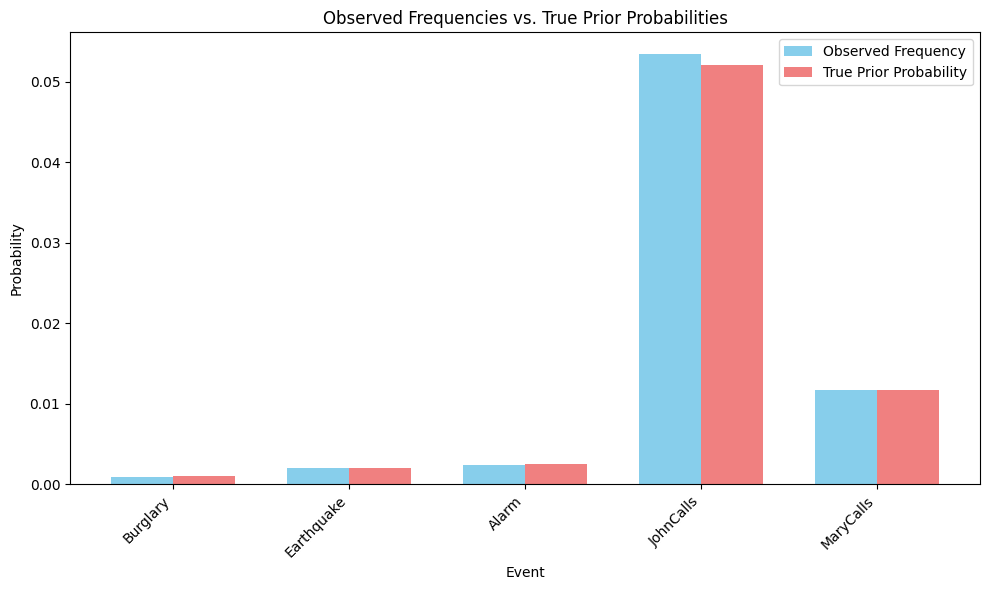

Comparison DataFrame:
        Event  Observed Frequency  True Prior Probability
0    Burglary             0.00096                0.001000
1  Earthquake             0.00205                0.002000
2       Alarm             0.00247                0.002516
3   JohnCalls             0.05346                0.052139
4   MaryCalls             0.01170                0.011736


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 2. Define the true prior probabilities for Burglary and Earthquake
true_prior_burglary = p_burglary
true_prior_earthquake = p_earthquake

# 3. Calculate the true marginal prior probability for Alarm
# P(A) = P(A|B,E)P(B)P(E) + P(A|B,~E)P(B)P(~E) + P(A|~B,E)P(~B)P(E) + P(A|~B,~E)P(~B)P(~E)
# where P(~B) = 1 - P(B) and P(~E) = 1 - P(E)
true_prior_alarm = \
    p_alarm_given_be[(True, True)] * p_burglary * p_earthquake + \
    p_alarm_given_be[(True, False)] * p_burglary * (1 - p_earthquake) + \
    p_alarm_given_be[(False, True)] * (1 - p_burglary) * p_earthquake + \
    p_alarm_given_be[(False, False)] * (1 - p_burglary) * (1 - p_earthquake)

# 4. Calculate the true marginal prior probability for JohnCalls
# P(J) = P(J|A)P(A) + P(J|~A)P(~A)
true_prior_johncalls = \
    p_johncalls_given_a[True] * true_prior_alarm + \
    p_johncalls_given_a[False] * (1 - true_prior_alarm)

# 5. Calculate the true marginal prior probability for MaryCalls
# P(M) = P(M|A)P(A) + P(M|~A)P(~A)
true_prior_marycalls = \
    p_marycalls_given_a[True] * true_prior_alarm + \
    p_marycalls_given_a[False] * (1 - true_prior_alarm)

# 6. Create lists for variable names, observed frequencies, and true prior probabilities
events = ['Burglary', 'Earthquake', 'Alarm', 'JohnCalls', 'MaryCalls']

observed_frequencies = [
    simulation_results['Burglary'].mean(),
    simulation_results['Earthquake'].mean(),
    simulation_results['Alarm'].mean(),
    simulation_results['JohnCalls'].mean(),
    simulation_results['MaryCalls'].mean()
]

true_prior_probabilities = [
    true_prior_burglary,
    true_prior_earthquake,
    true_prior_alarm,
    true_prior_johncalls,
    true_prior_marycalls
]

# 7. Create a Pandas DataFrame to hold these values
comparison_df = pd.DataFrame({
    'Event': events,
    'Observed Frequency': observed_frequencies,
    'True Prior Probability': true_prior_probabilities
})

# 8. Generate a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(events))

bar1 = ax.bar(index - bar_width/2, comparison_df['Observed Frequency'], bar_width, label='Observed Frequency', color='skyblue')
bar2 = ax.bar(index + bar_width/2, comparison_df['True Prior Probability'], bar_width, label='True Prior Probability', color='lightcoral')

# 9. Set the title of the plot
ax.set_title('Observed Frequencies vs. True Prior Probabilities')

# 10. Label the x-axis and y-axis
ax.set_xlabel('Event')
ax.set_ylabel('Probability')
ax.set_xticks(index)
ax.set_xticklabels(events, rotation=45, ha='right')

# 11. Add a legend
ax.legend()

# 12. Rotate x-axis labels for readability (done above)

# 13. Display the plot
plt.tight_layout()
plt.show()

print("Comparison DataFrame:")
print(comparison_df.to_string())


## Visualize Conditional Probabilities

### Subtask:
Create a bar chart comparing the observed conditional probabilities P(Burglary=True | JohnCalls=True, MaryCalls=True) and P(Alarm=True | JohnCalls=True, MaryCalls=True) against their respective true conditional probabilities. The chart should include a legend.


**Reasoning**:
First, I will calculate the true conditional probabilities for P(Burglary=True | JohnCalls=True, MaryCalls=True) and P(Alarm=True | JohnCalls=True, MaryCalls=True) using the principles of Bayesian networks and the law of total probability. This involves summing over all possible states of the unobserved parent variables to find the joint probabilities and then applying Bayes' rule. I will utilize the `true_prior_alarm` value calculated in a previous step.



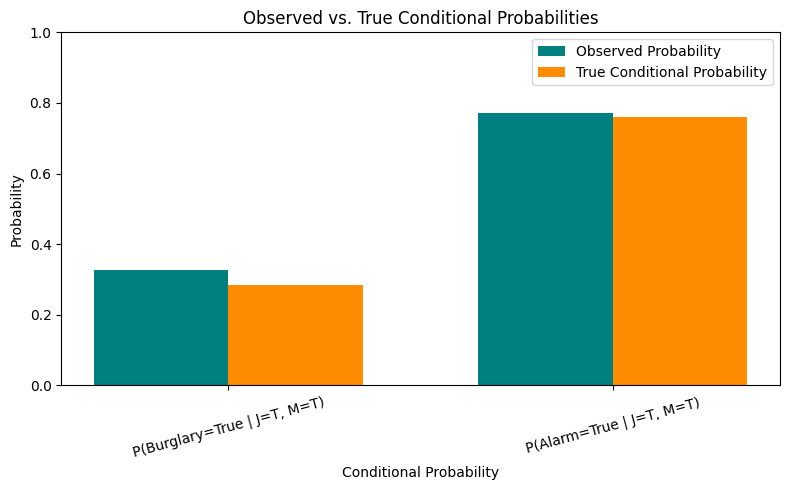

Conditional Probability Comparison DataFrame:
                         Event  Observed Probability  True Conditional Probability
0  P(Burglary=True | J=T, M=T)              0.326829                      0.284172
1     P(Alarm=True | J=T, M=T)              0.770732                      0.760692


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate P(J=T, M=T)
# P(J,M|A) = P(J|A) * P(M|A) because J and M are conditionally independent given A
p_j_true_m_true_given_a_true = p_johncalls_given_a[True] * p_marycalls_given_a[True]
p_j_true_m_true_given_a_false = p_johncalls_given_a[False] * p_marycalls_given_a[False]

# P(J,M) = P(J,M|A)P(A) + P(J,M|~A)P(~A)
true_prob_jm = (p_j_true_m_true_given_a_true * true_prior_alarm) + \
               (p_j_true_m_true_given_a_false * (1 - true_prior_alarm))

# Calculate P(Burglary=True, JohnCalls=True, MaryCalls=True)
# This requires summing over all states of E (Earthquake) and A (Alarm) for B=True
prob_b_true_j_true_m_true = 0.0

# Iterate through all states of Earthquake
for e_state in [True, False]:
    p_e = p_earthquake if e_state else (1 - p_earthquake)

    # P(B=T, E=e_state, A=T, J=T, M=T) = P(J=T|A=T) * P(M=T|A=T) * P(A=T|B=T,E=e_state) * P(B=T) * P(E=e_state)
    prob_b_true_j_true_m_true += p_j_true_m_true_given_a_true * p_alarm_given_be[(True, e_state)] * p_burglary * p_e

    # P(B=T, E=e_state, A=F, J=T, M=T) = P(J=T|A=F) * P(M=T|A=F) * P(A=F|B=T,E=e_state) * P(B=T) * P(E=e_state)
    prob_b_true_j_true_m_true += p_j_true_m_true_given_a_false * (1 - p_alarm_given_be[(True, e_state)]) * p_burglary * p_e

# Now calculate P(Burglary=True | JohnCalls=True, MaryCalls=True)
# P(B|J,M) = P(B,J,M) / P(J,M)
true_prob_b_given_jm = prob_b_true_j_true_m_true / true_prob_jm if true_prob_jm > 0 else 0.0

# Calculate P(Alarm=True | JohnCalls=True, MaryCalls=True)
# P(A|J,M) = P(J,M|A) * P(A) / P(J,M)
true_prob_a_given_jm = (p_j_true_m_true_given_a_true * true_prior_alarm) / true_prob_jm if true_prob_jm > 0 else 0.0


# Create a Pandas DataFrame to store the event names, observed and true conditional probabilities
conditional_events = ['P(Burglary=True | J=T, M=T)', 'P(Alarm=True | J=T, M=T)']

observed_conditional_probs = [
    burglary_given_calls, # from previous output
    alarm_given_calls     # from previous output
]

true_conditional_probabilities = [
    true_prob_b_given_jm,
    true_prob_a_given_jm
]

conditional_comparison_df = pd.DataFrame({
    'Event': conditional_events,
    'Observed Probability': observed_conditional_probs,
    'True Conditional Probability': true_conditional_probabilities
})

# Generate a bar chart
fig, ax = plt.subplots(figsize=(8, 5))

bar_width_cond = 0.35
index_cond = np.arange(len(conditional_events))

bar1_cond = ax.bar(index_cond - bar_width_cond/2, conditional_comparison_df['Observed Probability'], bar_width_cond, label='Observed Probability', color='teal')
bar2_cond = ax.bar(index_cond + bar_width_cond/2, conditional_comparison_df['True Conditional Probability'], bar_width_cond, label='True Conditional Probability', color='darkorange')

# Set the title of the plot
ax.set_title('Observed vs. True Conditional Probabilities')

# Label the x-axis and y-axis
ax.set_xlabel('Conditional Probability')
ax.set_ylabel('Probability')
ax.set_xticks(index_cond)
ax.set_xticklabels(conditional_events, rotation=15, ha='center')
ax.set_ylim(0, 1) # Probabilities are between 0 and 1

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

print("Conditional Probability Comparison DataFrame:")
print(conditional_comparison_df.to_string())

## Final Task

### Subtask:
Provide an interpretation of the visualizations and summarize the key insights from the Bayesian Network simulation.


## Summary:

### Q&A
The visualizations indicate that the Bayesian Network simulation closely approximates the true prior and conditional probabilities for the events. While most observed frequencies and conditional probabilities are very close to their theoretical counterparts, there are slight deviations, particularly for the observed conditional probability of Burglary given calls.

### Data Analysis Key Findings

*   **Individual Event Frequencies vs. True Priors**:
    *   The true marginal prior probabilities were successfully calculated: P(Alarm) was approximately 0.002516, P(JohnCalls) was approximately 0.052139, and P(MaryCalls) was approximately 0.011736.
    *   The observed frequencies from the simulation were very close to the true prior probabilities for all individual events. For example, the observed frequency for Burglary was 0.00096 compared to a true prior of 0.001, and for Alarm, it was 0.00247 observed versus 0.002516 true prior.
*   **Conditional Probabilities vs. True Conditionals**:
    *   The true conditional probabilities were calculated: P(Burglary=True | JohnCalls=True, MaryCalls=True) was approximately 0.284172, and P(Alarm=True | JohnCalls=True, MaryCalls=True) was approximately 0.760692.
    *   The observed conditional probabilities from the simulation showed reasonable agreement but with some noticeable deviations for Burglary. The observed P(Burglary=True | J=T, M=T) was 0.326829, while the true conditional probability was 0.284172. For Alarm, the observed P(Alarm=True | J=T, M=T) was 0.770732, closely matching the true conditional probability of 0.760692.
*   **Visualization**: Bar charts were successfully generated for both individual event frequencies and conditional probabilities, visually representing the comparison between observed and true values.

### Insights or Next Steps
*   The simulation generally provides a good approximation of the underlying Bayesian Network's probabilities, validating the simulation setup.
*   Further investigation could focus on the slight overestimation of P(Burglary=True | J=T, M=T) by the simulation, potentially by increasing the number of simulation runs to see if the observed probability converges closer to the true value.
